# Importing all Necessary libraries and Checking for appropriate version

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn 

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklern: {}'.format(sklearn.__version__))


Python: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.15.0
Pandas: 0.23.3
Matplotlib: 2.2.2
Seaborn: 0.9.0
Scipy: 1.1.0
Sklern: 0.19.1


In [2]:
# import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Credit Card Dataset

In [3]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

# Dataset Details

In [4]:
 #explore the datasets
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [6]:
# Determine number of fraud cases in dataset

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))

print("OutlierFraction : ",outlier_fraction)

print('Fraud Cases : {}'.format(len(fraud)))
print('valid Cases : {}'.format(len(valid)))


OutlierFraction :  0.0017304750013189597
Fraud Cases : 492
valid Cases : 284315


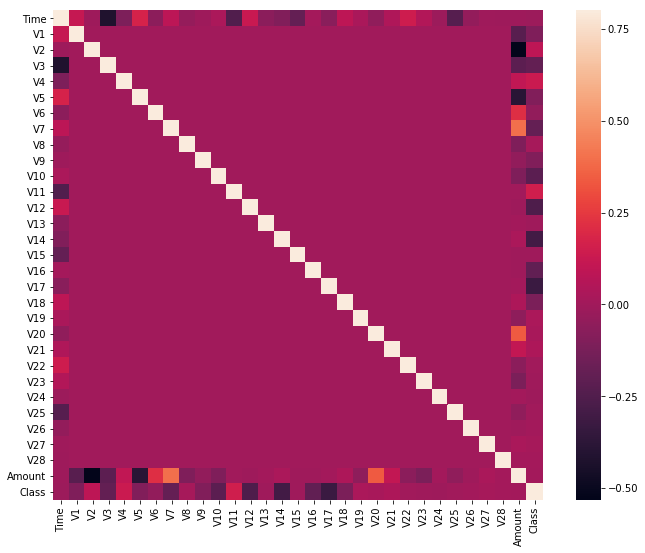

In [7]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# Pre-processing the Data

In [8]:
# Get all the columns from the dataframe
columns = data.columns.tolist()
print(columns)
# Filter the columns to remove data we do not want

columns = [c for c in columns if c not in ["Class"]]
print(type(columns))

#store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

#print the shapes of X and y
print(X.shape)
print(Y.shape)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
<class 'list'>
(284807, 30)
(284807,)


# Defining the Outlier Detection Model

In [9]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination=outlier_fraction)
}

# Fitting the model on training data and let it predict the outlier

In [13]:
# Fit the model
n_outliers = len(fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    #fit the data tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    

    # Reshape the Prediction values to 0 for valid and 1 for fraudlent
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred !=Y).sum()
    
    #run classifiaction metrics
    print('{}: {}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Isolation Forest: 645
0.997735308472053
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.34      0.35      0.35       492

avg / total       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.05      0.05      0.05       492

avg / total       1.00      1.00      1.00    284807

